In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

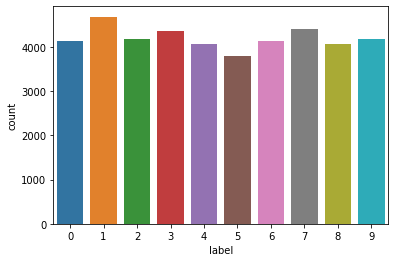

In [4]:
sns.countplot(df['label']);
df['label'].value_counts()

## We see that digit 1 count is litle higher than any one else in dataFrame.

## Plotting some of data to visualize. 

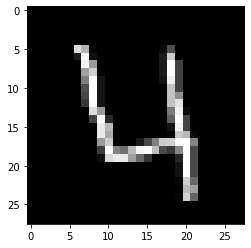

In [5]:
df1 = df.iloc[3, 1:]
df1 = df1.values.reshape(28,28)
plt.imshow(df1, cmap='gray');

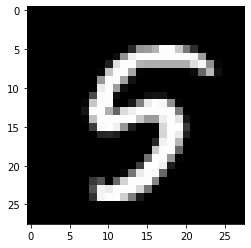

In [6]:
df2 = df.iloc[8, 1:]
df2 = df2.values.reshape(28,28)
plt.imshow(df2, cmap='gray');

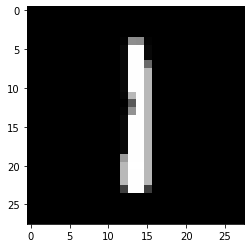

In [7]:
df3 = df.iloc[2, 1:]
df3 = df3.values.reshape(28,28)
plt.imshow(df3, cmap='gray');

In [8]:
X = df.drop('label', axis = 1).values

y = df['label'].values

In [9]:
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (42000, 784) 
 Shape of y: (42000,)


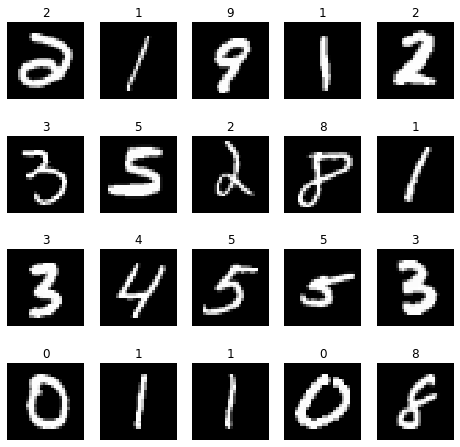

In [10]:
def plot_images(images, labels ):
    cols = min(5, len(images))
    rows= len(images) // cols 
    fig = plt.figure(figsize=(8,8))
    
    for i in range (rows * cols):
        ax = fig.add_subplot(rows,cols,i+1)
        plt.axis('off')
        plt.imshow(images[i], cmap = 'gray')
        ax.set_title(labels[i])
    plt.show()
# lets plot range of 20 images 
a = np.random.permutation(len(X))
a = a[:20]
plot_images(X[a].reshape(-1,28,28),y[a])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=10)

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
nl = MLPClassifier()

In [15]:
nl.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
pred = nl.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
accuracy = metrics.accuracy_score(y_test,pred)
print(accuracy)

0.9501587301587302


In [19]:
pred.shape

(12600,)

In [20]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test.shape

(28000, 784)

In [22]:
y_pred = nl.predict(test)

In [23]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [24]:
submission = pd.DataFrame({ 'ImageId': range(1, 28001), 'Label': y_pred })
submission.to_csv("digit_Recognition.csv", index=False)